# Cleaning the data

In [259]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [260]:
# importing .csv file and removing the first header
input_file = 'Algerian_forest_fires_dataset_UPDATE.csv'
num_lines_to_skip = 1  # Number of lines to skip, including header

# Read the CSV file, skipping the specified number of lines
df = pd.read_csv(input_file, skip_blank_lines=True,skiprows=range(num_lines_to_skip),sep=",")

df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [261]:
df.shape # there are supposed to be 244 entries 

(246, 14)

In [262]:
df[120:125]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire


In [263]:
# removing the text entries
df = df[~df['day'].str.startswith('Sidi')]
df = df[~df['day'].str.startswith('day')]
df[120:125]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
125,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire
126,03,06,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire


In [264]:
df.shape

(244, 14)

In [265]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

In [266]:
#removing blanck spaces from column names
df.columns=["day","month","year","Temperature","RH","Ws","Rain","FFMC","DMC","DC","ISI","BUI","FWI","Classes"]

In [267]:
# looking for any missing value
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
dtype: int64

In [268]:
# indexing the row with missing value
rows_with_null = df[df['Classes'].isnull()]
print(rows_with_null)

    day month  year Temperature  RH  Ws Rain  FFMC   DMC      DC   ISI   BUI  \
167  14    07  2012          37  37  18  0.2  88.9  12.9  14.6 9  12.5  10.4   

         FWI Classes  
167  fire        NaN  


In [269]:
df[163:168]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
165,12,07,2012,36,44,13,0,90.1,12.6,19.4,8.3,12.5,9.6,fire
166,13,07,2012,39,45,13,0.6,85.2,11.3,10.4,4.2,10.9,4.7,fire
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN
168,15,07,2012,34,45,17,0,90.5,18,24.1,10.9,17.7,14.1,fire
169,16,07,2012,31,83,17,0,84.5,19.4,33.1,4.7,19.2,7.3,fire


In [270]:
df=df.drop(167)
df[164:168]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
166,13,07,2012,39,45,13,0.6,85.2,11.3,10.4,4.2,10.9,4.7,fire
168,15,07,2012,34,45,17,0,90.5,18,24.1,10.9,17.7,14.1,fire
169,16,07,2012,31,83,17,0,84.5,19.4,33.1,4.7,19.2,7.3,fire
170,17,07,2012,32,81,17,0,84.6,21.1,42.3,4.7,20.9,7.7,fire


In [271]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [272]:
df['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [273]:
#removing black spaces from categorical feature
df['Classes'] = df['Classes'].str.strip()

In [274]:
df['Classes'].unique()

array(['not fire', 'fire'], dtype=object)

In [275]:
#mapping string with booleans in categorical feature
df['Classes']=df['Classes'].map({'fire':1,'not fire':0})

In [276]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,0


In [277]:
df.shape

(243, 14)

In [278]:
print(df.dtypes)

day            object
month          object
year           object
Temperature    object
RH             object
Ws             object
Rain           object
FFMC           object
DMC            object
DC             object
ISI            object
BUI            object
FWI            object
Classes         int64
dtype: object


In [279]:
#changing the numerical features to int/float type
df=df.apply(pd.to_numeric)

In [280]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    int64  
dtypes: float64(7), int64(7)
memory usage: 28.5 KB


In [285]:
df.to_csv('Algerian_forest_fires_dataset_CLEANED.csv',index=False)

## Exploratory data analysis (EDA)

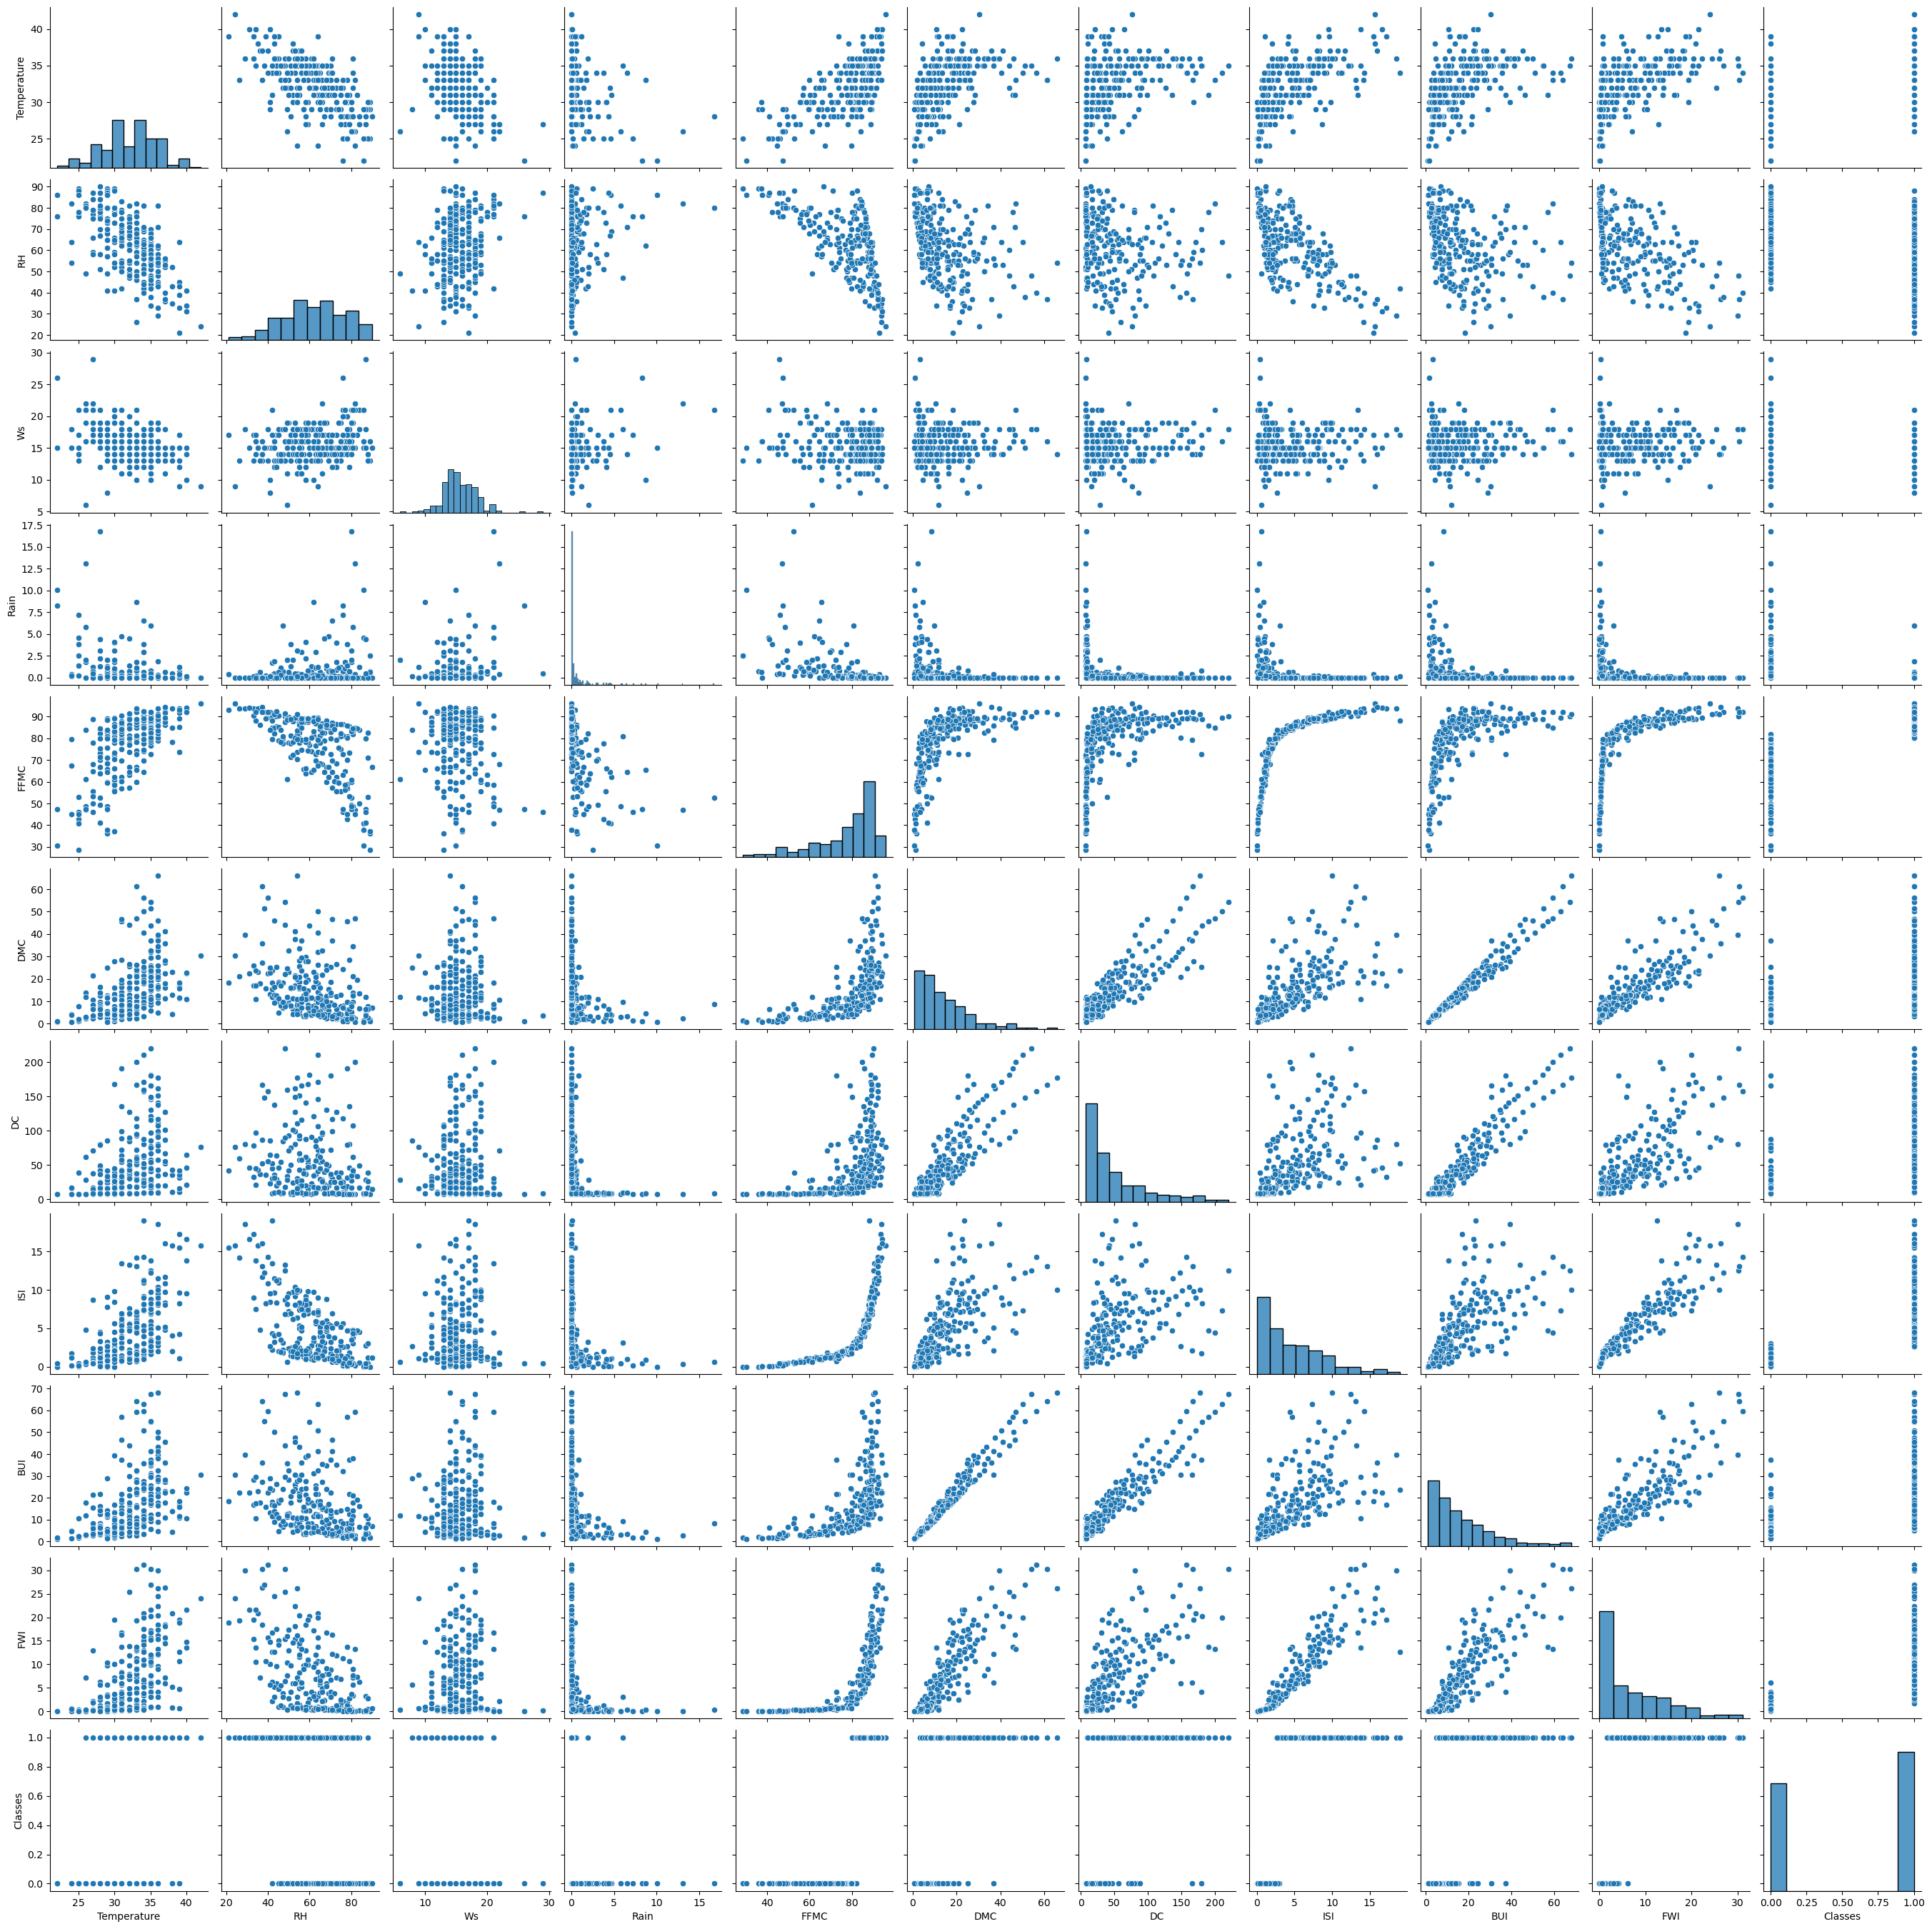

In [282]:
import seaborn as sns
#sns.pairplot(df)
sns.pairplot(df[df.columns[3:]])

In [284]:
# dropping day,month,year column
df=df.drop(['day','month','year'],axis=1)

In [286]:
# Checking for unbalanced data
percentage=df['Classes'].value_counts(normalize=True)*100
percentage

1    56.378601
0    43.621399
Name: Classes, dtype: float64

#### Piechart

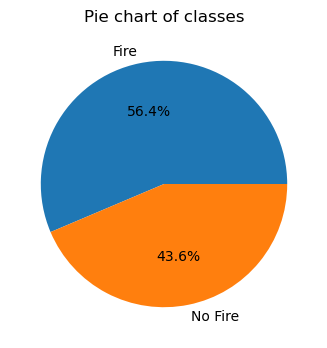

In [291]:
classeslabel=['Fire','No Fire']
plt.figure(figsize=(8,4))
plt.pie(percentage,labels=classeslabel,autopct='%1.1f%%')
plt.title('Pie chart of classes',fontsize=12)
plt.show()